In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = F)

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb,6)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb) <- newnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [6]:
#Caracteres especiales
airbnb$CodigoPostal[airbnb$CodigoPostal==''|airbnb$CodigoPostal=='-'|airbnb$CodigoPostal=='28']<-NA
#Valores repetidos del 28002
airbnb$CodigoPostal[airbnb$CodigoPostal=='28002'|airbnb$CodigoPostal=='28002\n28002']<-'28002'
#Valores repetidos del 28004
airbnb$CodigoPostal[airbnb$CodigoPostal=='2804'|airbnb$CodigoPostal=='28004'|airbnb$CodigoPostal=='Madrid 28004']<-'28004'
#Valores repetidos del 28005
airbnb$CodigoPostal[airbnb$CodigoPostal=='2805'|airbnb$CodigoPostal=='28005']<-'28005'
#Valores repetidos del 28013
airbnb$CodigoPostal[airbnb$CodigoPostal=='28013'|airbnb$CodigoPostal=='280013']<-'28013'
#Valores repetidos del 28015
airbnb$CodigoPostal[airbnb$CodigoPostal=='2815'|airbnb$CodigoPostal=='28015']<-'28015'
#Valores repetidos del 28051
airbnb$CodigoPostal[airbnb$CodigoPostal=='28051'|airbnb$CodigoPostal=='28051\n28051']<-'28051'
#Los que no comienzan con 28
airbnb$CodigoPostal[!startsWith(airbnb$CodigoPostal, '28')]<-NA

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [7]:
#Cantidad
print("La cantidad de distintos codigos postales es:")
length(levels(factor(airbnb$CodigoPostal)))
#Listado
print("Los distintos valores de codigo postal son:")
levels(factor(airbnb$CodigoPostal))

[1] "La cantidad de distintos codigos postales es:"


[1] 61

[1] "Los distintos valores de codigo postal son:"


[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [8]:
Codigos <- aggregate(
                    x=airbnb$CodigoPostal, 
                    by = list(CodigoPostal = airbnb$CodigoPostal), 
                    FUN = length
            )
names(Codigos) <- c('CodigoPostal', 'Cantidad')

#Los que tienen mas entradas
print("Los que tienen mas entradas:")
head(Codigos[order(-Codigos$Cantidad),],5)
#Los que tienen menos entradas
print("Los que tienen menos entradas:")
head(Codigos[order(Codigos$Cantidad),],5)

[1] "Los que tienen mas entradas:"


,CodigoPostal,Cantidad
,<chr>,<int>
12,28012,2060
4,28004,1796
5,28005,1195
13,28013,1020
14,28014,630


[1] "Los que tienen menos entradas:"


,CodigoPostal,Cantidad
,<chr>,<int>
48,28048,1
52,28052,1
56,28056,1
57,28058,1
58,28060,1


¿Cuales son los barrios que hay en el código postal 28012?

In [9]:
print("Los barrios con codigo postal 28012:")
levels(factor(airbnb$Barrio[airbnb$CodigoPostal=='28012']))

[1] "Los barrios con codigo postal 28012:"


[1] "Acacias"         "Arapiles"        "Atocha"          "Cortes"         
 [5] "Delicias"        "Embajadores"     "Goya"            "Palacio"        
 [9] "Palos de Moguer" "Sol"             "Universidad"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postao 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal?

In [10]:
#Filtrando por nombre de barrio obtenidos en la pregunta previa
airbnb28012 <- airbnb[airbnb$Barrio=='Acacias'
                      |airbnb$Barrio=='Arapiles'
                      |airbnb$Barrio=='Atocha'
                      |airbnb$Barrio=='Cortes'
                      |airbnb$Barrio=='Delicias'
                      |airbnb$Barrio=='Embajadores'
                      |airbnb$Barrio=='Goya'
                      |airbnb$Barrio=='Palacio'
                      |airbnb$Barrio=='Palos de Moguer'
                      |airbnb$Barrio=='Sol'
                      |airbnb$Barrio=='Universidad',]

Barrios <- aggregate(
                    x=airbnb28012$Barrio, 
                    by = list(Barrio = airbnb28012$Barrio, airbnb28012$CodigoPostal), 
                    FUN = length
            )
names(Barrios) <- c('Barrio', 'Cantidad')
#Cantidad de entradas por barrio en el codigo postal 28012
print("Cantidad de entradas por barrio en el codigo postal 28012")
Barrios[order(Barrios$Barrio),]
print("Se observa que no todos la los barrios listados se encuentran en su totalidad dentro del codigo postal.Por lo que se podria indicar que hay inconsistencias en la relacion de ambos campos")
#RESPUESTA:Se observa que no todos la los barrios listados se encuentran en su totalidad dentro del codigo postal.
#Por lo que se podria indicar que hay inconsistencias en la relacion de ambos campos

[1] "Cantidad de entradas por barrio en el codigo postal 28012"


,Barrio,Cantidad,NA
,<chr>,<chr>,<int>
5,Acacias,28004,1
10,Acacias,28005,117
26,Acacias,28012,13
54,Acacias,28019,1
58,Acacias,28045,6
63,Acacias,28047,1
3,Arapiles,28003,8
23,Arapiles,28010,3
27,Arapiles,28012,1


[1] "Se observa que no todos la los barrios listados se encuentran en su totalidad dentro del codigo postal.Por lo que se podria indicar que hay inconsistencias en la relacion de ambos campos"


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [11]:
#Cantidad de barrios
print("Cantidad de barrios en todo el ds:")
length(levels(factor(airbnb$Barrio)))
#Listado
print("Listado de barrios")
levels(factor(airbnb$Barrio))

[1] "Cantidad de barrios en todo el ds:"


[1] 125

[1] "Listado de barrios"


[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29] "Casco Histórico de Vallecas"  "Casco Histórico de Vicálvaro"
 [31] "Castellana"                   "Castilla"                    
 [33] "Castillejos"                  "Chopera"                     
 [35] "Ciudad Jardín"                "Ciudad Universitaria"        
 [37] "Colina"                       "Comillas"                    
 [39] "Concepción"                   "Corralejos"                  
 [41] "Cortes"                       "Costillares"                 
 [43] "Cuatro Caminos"               "Cuatro Vientos"              
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [12]:
Barrios <- aggregate(
                    x=airbnb$Barrio, 
                    by = list(Barrio = airbnb$Barrio), 
                    FUN = length
            )
names(Barrios) <- c('Barrio', 'Cantidad')
#Cantidad de entradas por barrio
print("Barrios con más entradas:")
head(Barrios[order(-Barrios$Cantidad),],5)

[1] "Barrios con más entradas:"


,Barrio,Cantidad
,<chr>,<int>
49,Embajadores,1844
115,Universidad,1358
81,Palacio,1083
112,Sol,940
63,Justicia,785


¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [13]:
TipoAlquileres <- aggregate(
                    x=airbnb$TipoAlquiler, 
                    by = list(airbnb$TipoAlquiler), 
                    FUN = length
            )
names(TipoAlquileres) <- c('TipoAlquiler', 'Cantidad')

#Cantidad Tipo Alquileres
print("Tipos de alquiler:")
length(levels(factor(TipoAlquileres$TipoAlquiler)))
#Listado Tipo Alquileres
print("Listado tipo de alquiler")
levels(factor(TipoAlquileres$TipoAlquiler))
#Cantidad de entradas por tipo
print("Cantidad de entradas por tipo de alquiler")
TipoAlquileres

[1] "Tipos de alquiler:"


[1] 3

[1] "Listado tipo de alquiler"


[1] "Entire home/apt" "Private room"    "Shared room"

[1] "Cantidad de entradas por tipo de alquiler"


TipoAlquiler,Cantidad
<chr>,<int>
Entire home/apt,7903
Private room,5113
Shared room,191


Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


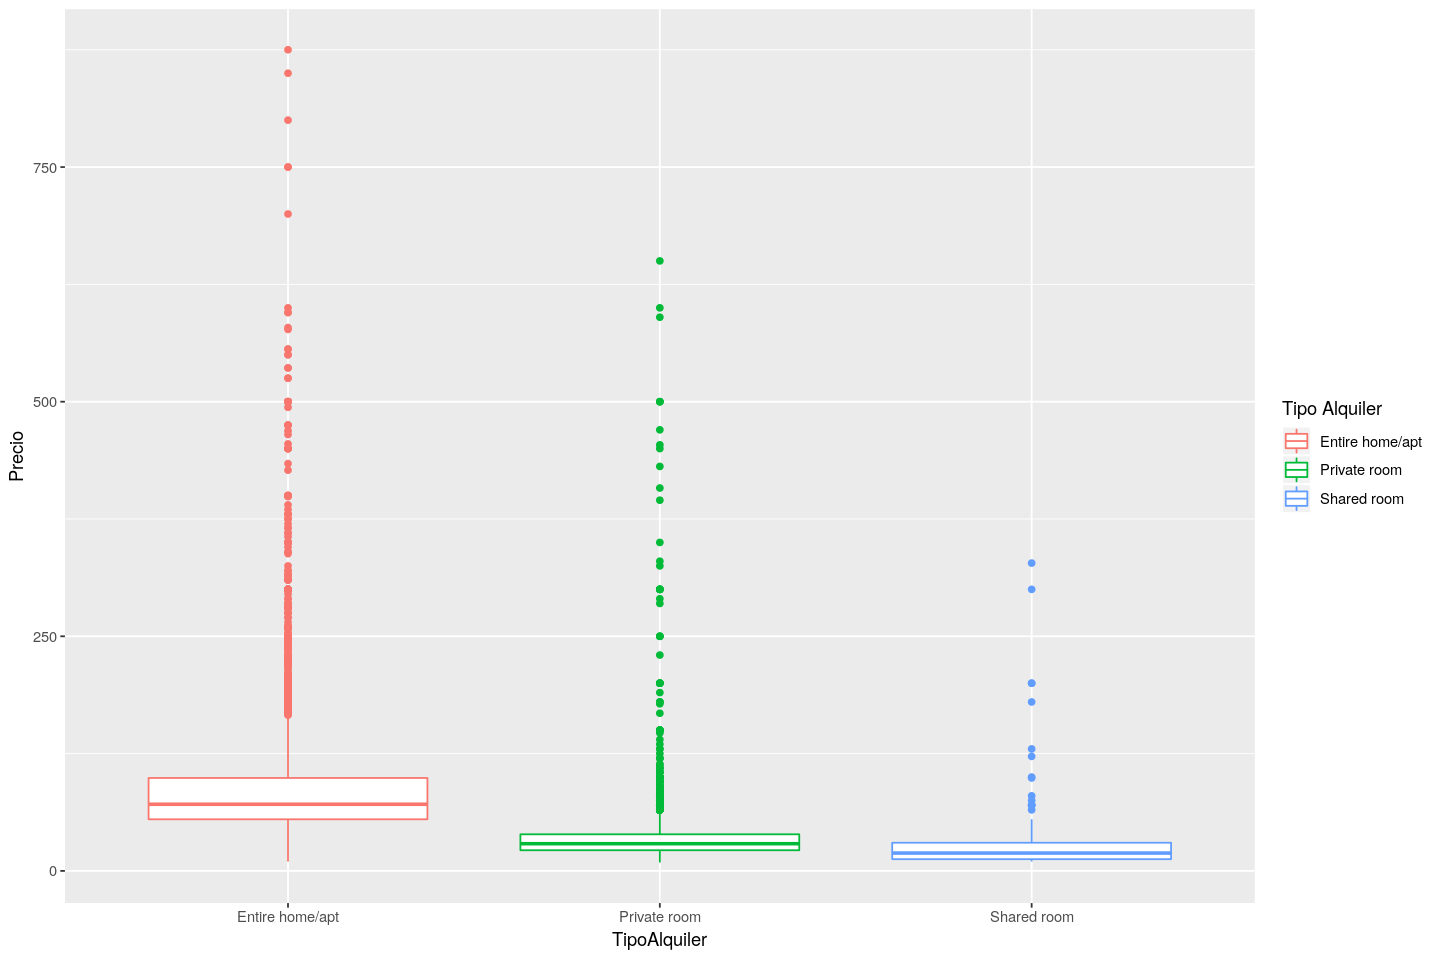

In [14]:
options(repr.plot.height=8,repr.plot.width=12)
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+
    geom_boxplot()+
    scale_color_discrete(name="Tipo Alquiler")

Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [15]:
#Entire
length(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Entire home/apt']))
mean(airbnb$Precio[airbnb$TipoAlquiler=='Entire home/apt'], na.rm=T)
length(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Entire home/apt' & airbnb$CodigoPostal==28012]))
mean(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Entire home/apt' & airbnb$CodigoPostal==28012]))
shapiro.test(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Entire home/apt' & airbnb$CodigoPostal==28012]))$p.value

[1] 7896

[1] 87.29661

[1] 1435

[1] 81.29686

[1] 1.812853e-45

In [16]:
#Private
length(airbnb$Precio[airbnb$TipoAlquiler=='Private room'])
mean(airbnb$Precio[airbnb$TipoAlquiler=='Private room'], na.rm=T)
length(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Private room' & airbnb$CodigoPostal==28012]))
mean(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Private room' & airbnb$CodigoPostal==28012]))
shapiro.test(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Private room'& airbnb$CodigoPostal==28012]))$p.value

[1] 5113

[1] 34.25514

[1] 603

[1] 34.04312

[1] 1.687393e-32

In [17]:
#Shared
length(airbnb$Precio[airbnb$TipoAlquiler=='Shared room'])
mean(airbnb$Precio[airbnb$TipoAlquiler=='Shared room'], na.rm=T)
length(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Shared room' & airbnb$CodigoPostal==28012]))
mean(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Shared room' & airbnb$CodigoPostal==28012]))
shapiro.test(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Shared room']))$p.value

[1] 191

[1] 29.8534

[1] 22

[1] 45.09091

[1] 4.516721e-24

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [18]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler=='Entire home/apt',]

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [19]:
Apartamentos <- aggregate(
                    x=airbnb_entire$Barrio, 
                    by = list(airbnb_entire$Barrio), 
                    FUN = length
            )
names(Apartamentos) <- c('Barrio', 'Cantidad')
#Cantidad de entradas por barrio
print("Barrios con más apartamentos enteros en alquiler:")
head(Apartamentos[order(-Apartamentos$Cantidad),],5)

[1] "Barrios con más apartamentos enteros en alquiler:"


,Barrio,Cantidad
,<chr>,<int>
45,Embajadores,1228
109,Universidad,984
76,Palacio,769
106,Sol,701
39,Cortes,574


¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [20]:
Precios <- aggregate(
                    x=airbnb_entire$Precio, 
                    by = list(airbnb_entire$Barrio), 
                    FUN = mean,
                    na.rm=TRUE
            )
names(Precios) <- c('Barrio', 'PrecioPromedio')
#Precios promedio por barrio
print("Barrios con mayor precio promedio:")
head(Precios[order(-Precios$PrecioPromedio),],5)

[1] "Barrios con mayor precio promedio:"


,Barrio,PrecioPromedio
,<chr>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [21]:
ApartamentosYPrecios<- merge(Apartamentos, Precios, by.x="Barrio", by.y="Barrio", na.ignore=T)
names(ApartamentosYPrecios) <- c('Barrio', 'Freq', 'Precio')
ApartamentosYPrecios

Barrio,Freq,Precio
<chr>,<int>,<dbl>
Abrantes,3,46.00000
Acacias,61,68.16393
Adelfas,33,68.72727
Aeropuerto,2,38.00000
Aguilas,2,54.50000
Alameda de Osuna,4,138.75000
Almagro,97,109.18557
Almenara,25,65.68000
Almendrales,18,77.50000


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [22]:
ApartamentosMas100 <- ApartamentosYPrecios[ApartamentosYPrecios$Freq>100,]
head(ApartamentosMas100$Barrio[order(-ApartamentosMas100$Precio)],5)

[1] "Recoletos" "Goya"      "Sol"       "Trafalgar" "Justicia"

Dibuja el diagrama de densidad de distribución de los diferentes precios

Warning message:
“Removed 9 rows containing non-finite values (stat_density).”


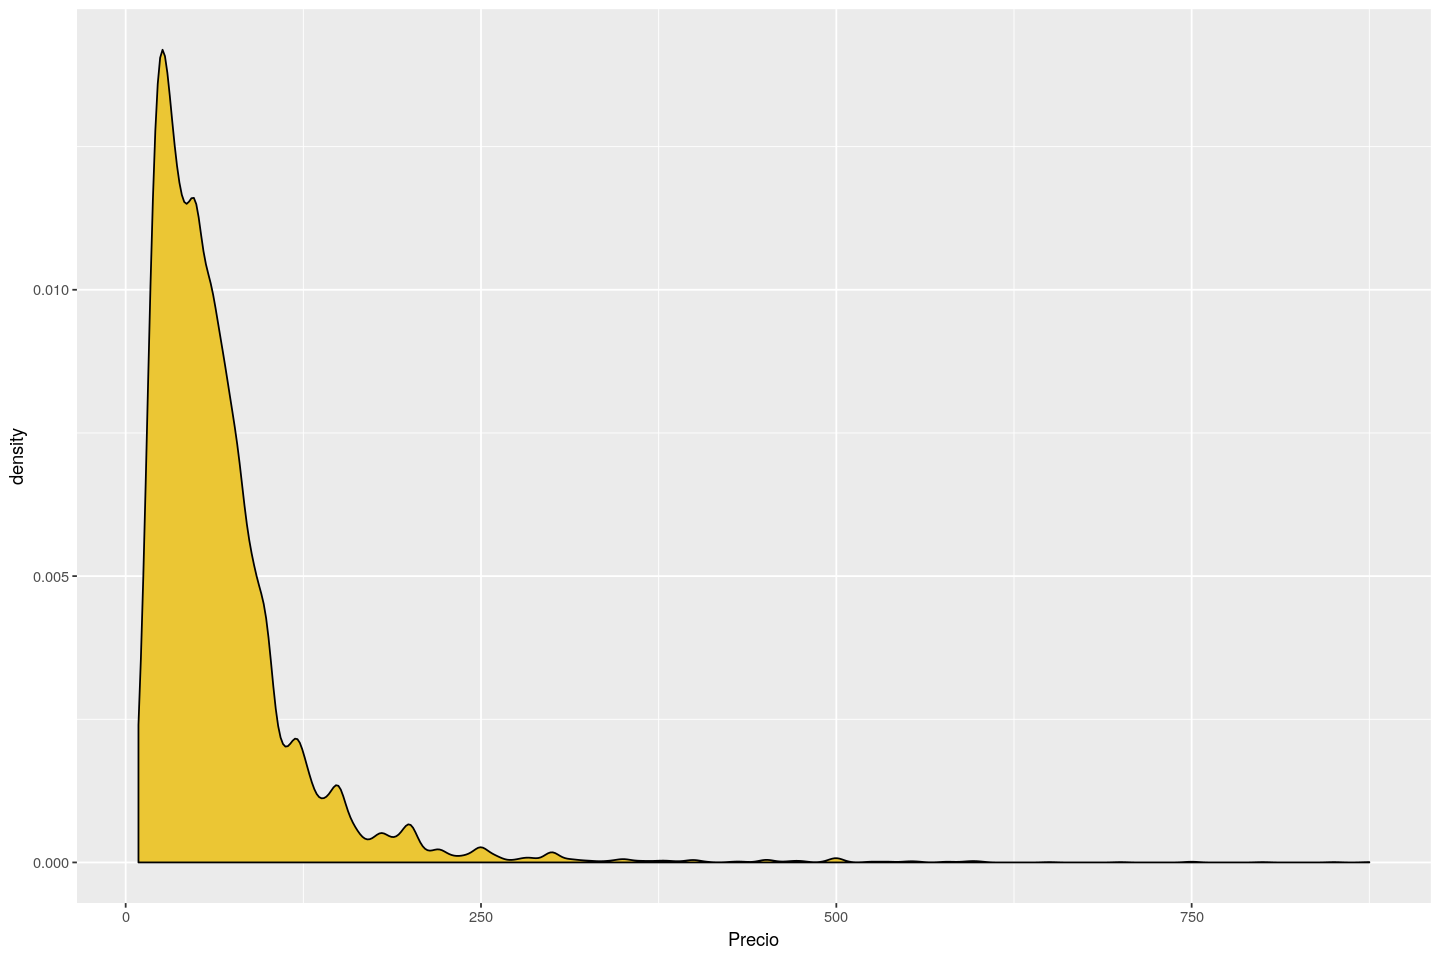

In [23]:
#Todo el ds
ggplot(data=airbnb,aes(x=Precio))+
    geom_density(fill="#ebc634")

Warning message:
“Removed 7 rows containing non-finite values (stat_density).”


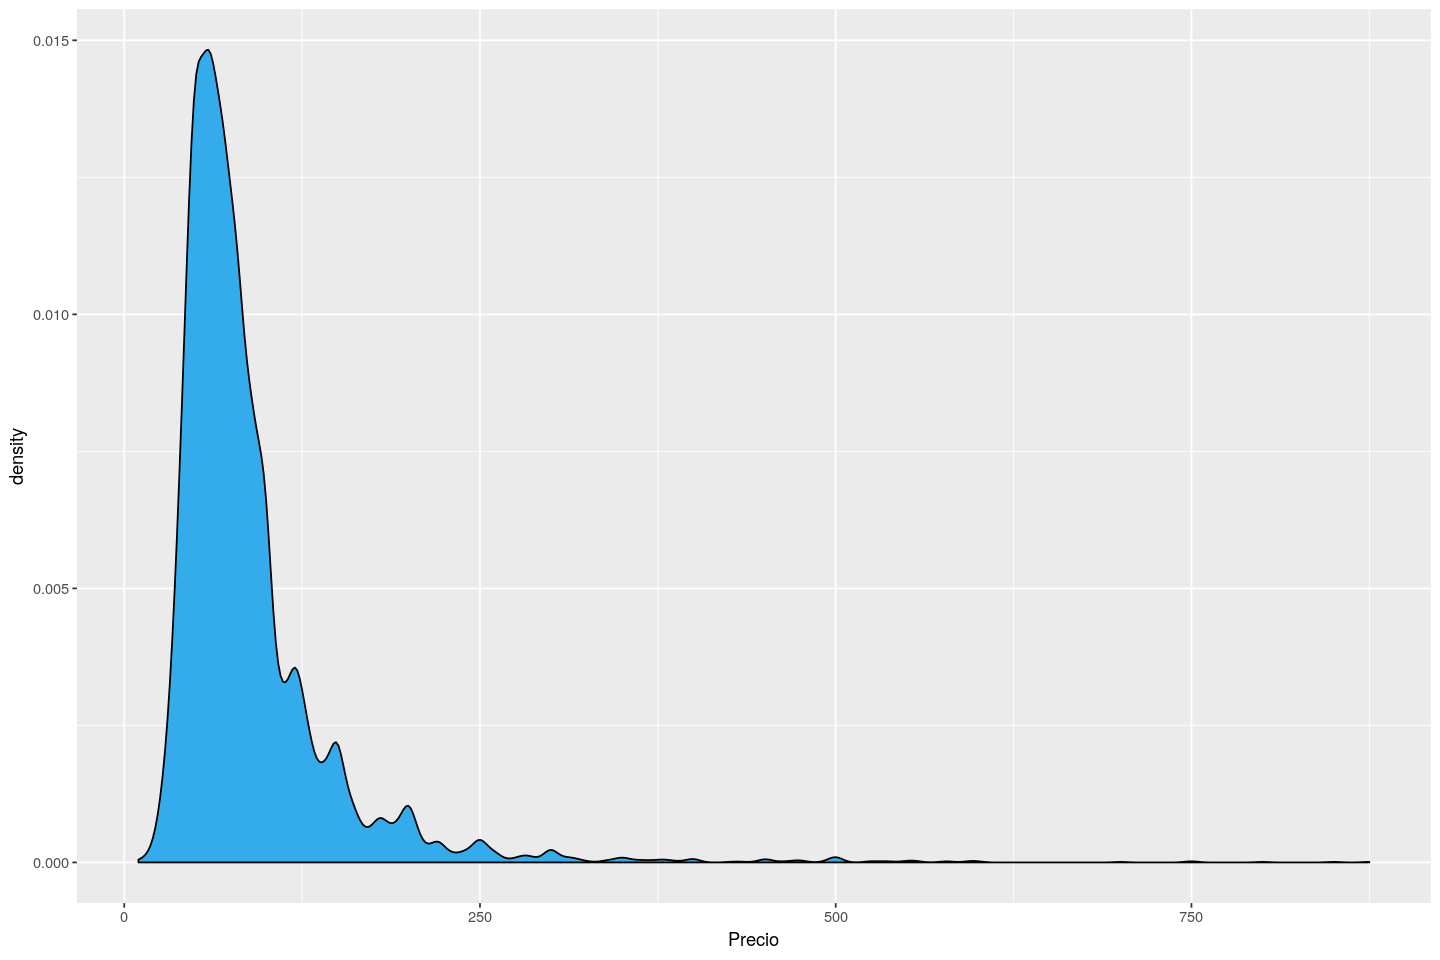

In [24]:
#entire
ggplot(data=airbnb_entire,aes(x=Precio))+
    geom_density(fill="#34abeb")

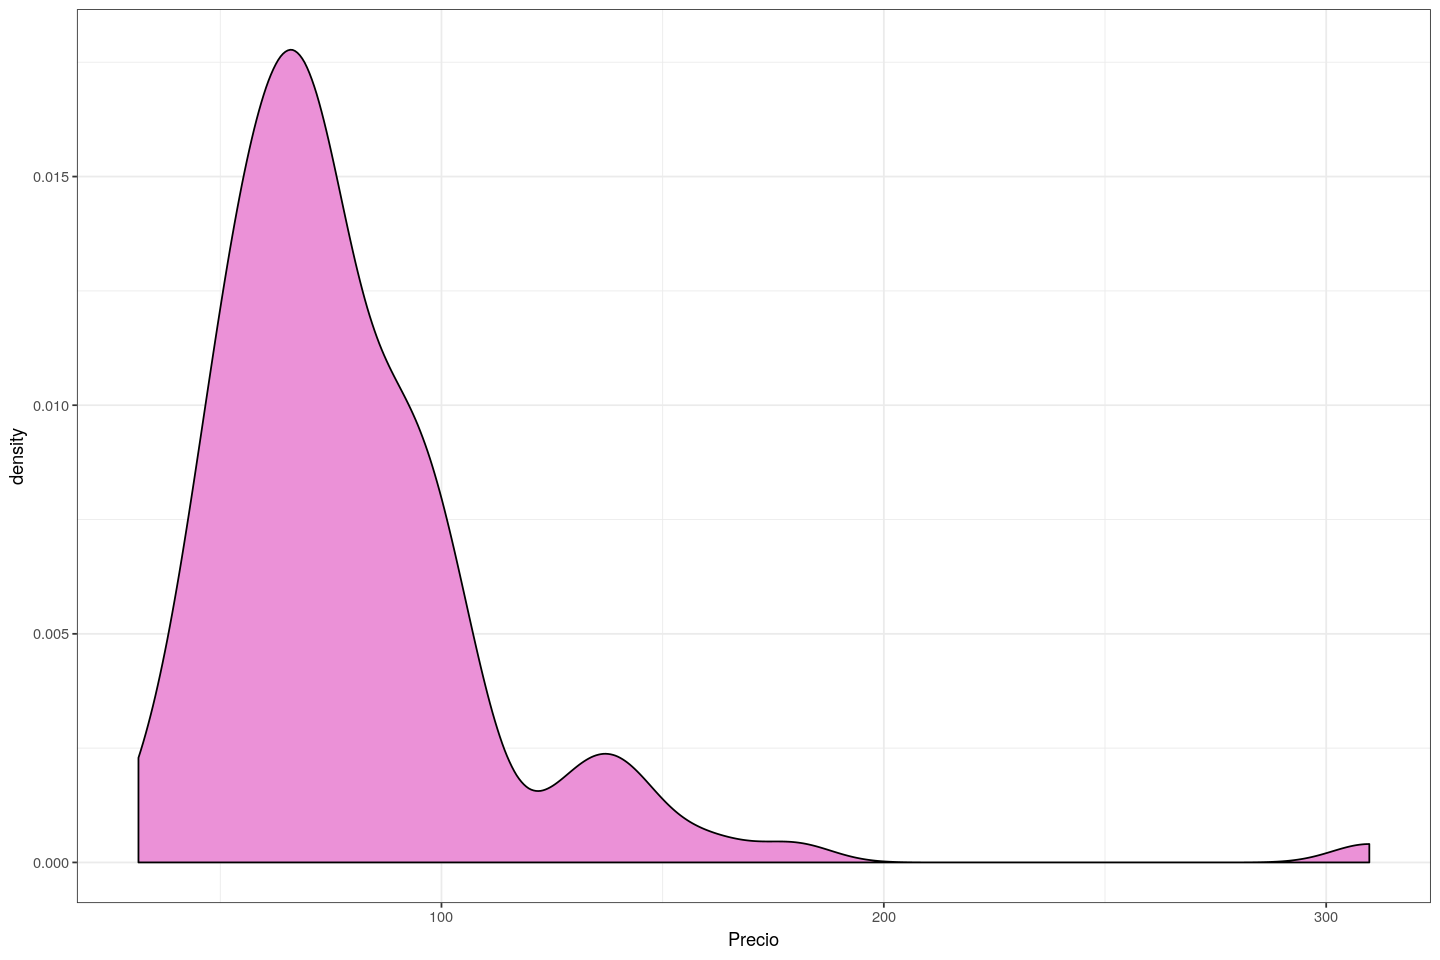

In [25]:
#ApartamentosYPrecios
ggplot(data=ApartamentosYPrecios,aes(x=Precio))+
    geom_density(fill="#eb91d7")+
    theme_bw()

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [26]:
airbnb_entire_5 <- airbnb_entire[airbnb_entire$Barrio=='Recoletos'
              |airbnb_entire$Barrio=='Goya'
              |airbnb_entire$Barrio=='Sol'
              |airbnb_entire$Barrio=='Trafalgar'
              |airbnb_entire$Barrio=='Justicia',]

Tamanio <- aggregate(
                    x=airbnb_entire_5$MetrosCuadrado, 
                    by = list(airbnb_entire_5$Barrio), 
                    FUN = mean,
                    na.rm=TRUE
            )
names(Tamanio) <- c('Barrio', 'Tamanio')

ApartamentosPreciosTamanio<- merge(ApartamentosYPrecios, Tamanio, by.x="Barrio", by.y="Barrio", na.ignore=T)
ApartamentosPreciosTamanio

Barrio,Freq,Precio,Tamanio
<chr>,<int>,<dbl>,<dbl>
Goya,142,111.33803,51.68504
Justicia,534,98.25468,28.52669
Recoletos,135,161.92537,26.66316
Sol,701,100.75036,45.61692
Trafalgar,223,98.57848,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

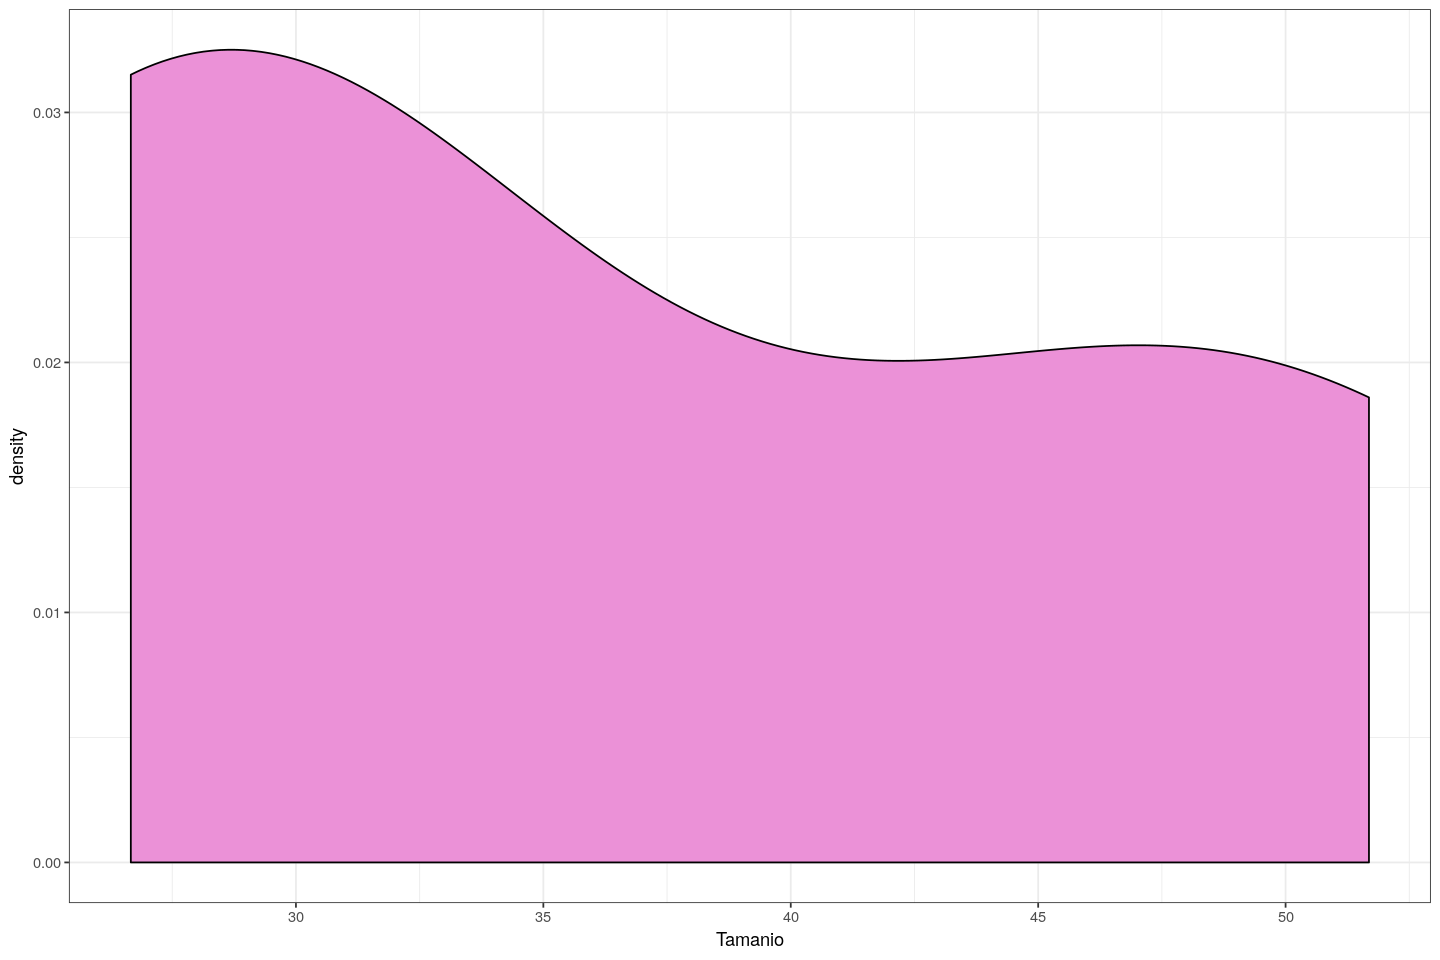

In [27]:
#ApartamentosYPrecios
ggplot(data=ApartamentosPreciosTamanio,aes(x=Tamanio))+
    geom_density(fill="#eb91d7")+
    theme_bw()

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [28]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
barrio_sol$NumBanyos[is.na(barrio_sol$NumBanyos)] <- 0
barrio_sol$NumDormitorios[is.na(barrio_sol$NumDormitorios)] <- 0
barrio_sol$MaxOcupantes[is.na(barrio_sol$MaxOcupantes)] <- 0
barrio_sol$MetrosCuadrados[is.na(barrio_sol$MetrosCuadrados)] <- 0

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

[1] "La correlación de las variables NumBanyos y NumDormitorios es: 0.68"

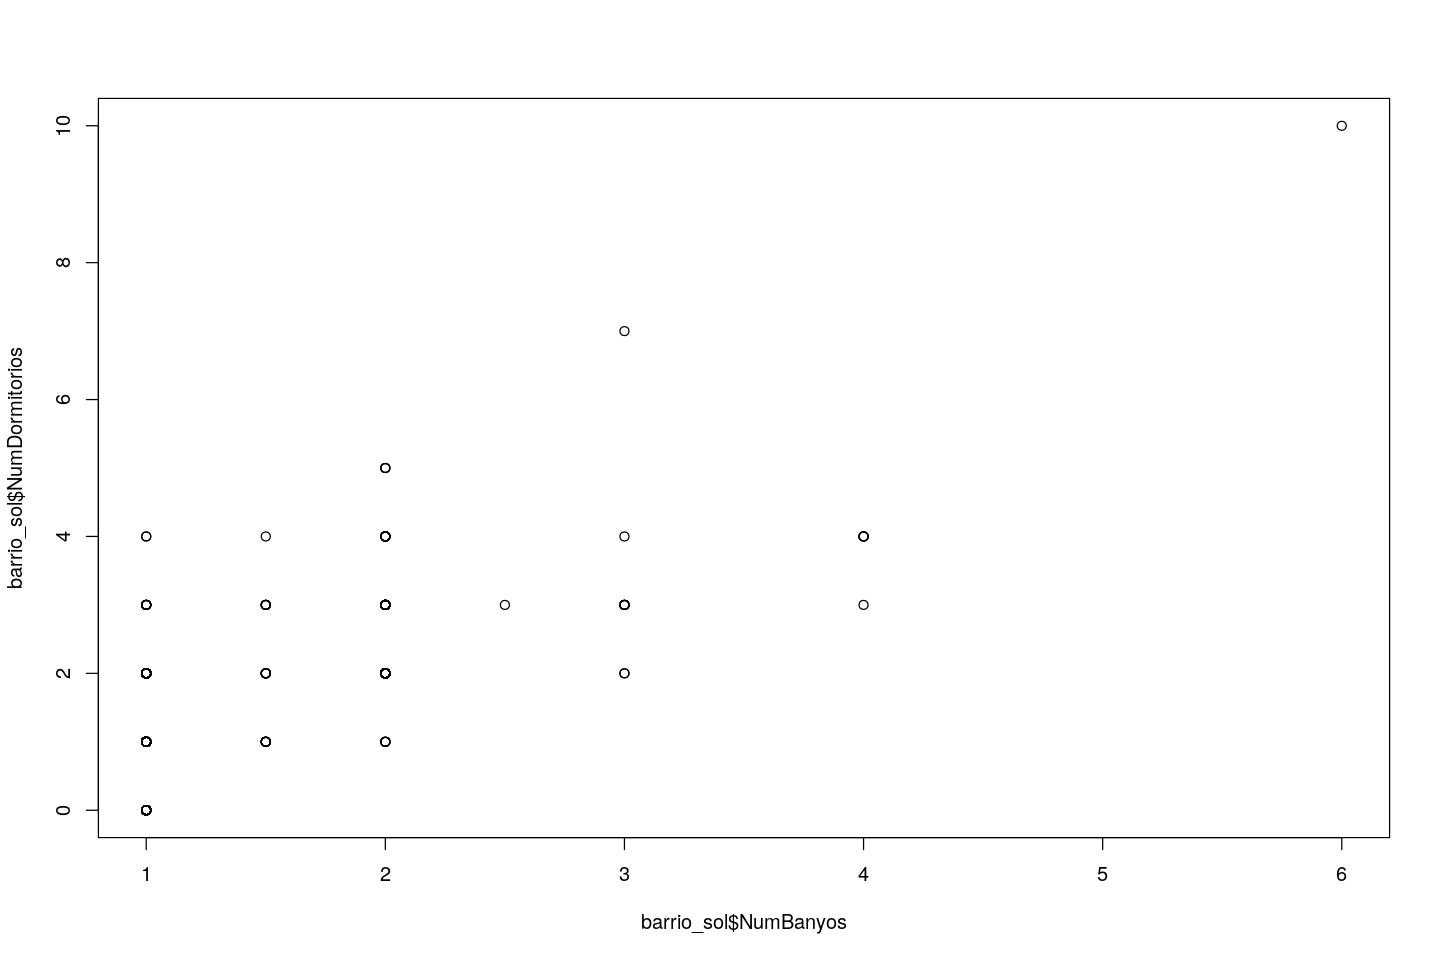

In [29]:
#NumBanyos y NumDormitorios
paste("La correlación de las variables NumBanyos y NumDormitorios es:",
      round(cor(barrio_sol$NumBanyos, barrio_sol$NumDormitorios),2))
plot(barrio_sol$NumBanyos, barrio_sol$NumDormitorios)

[1] "La correlación de las variables NumBanyos y MaxOcupantes es: 0.66"

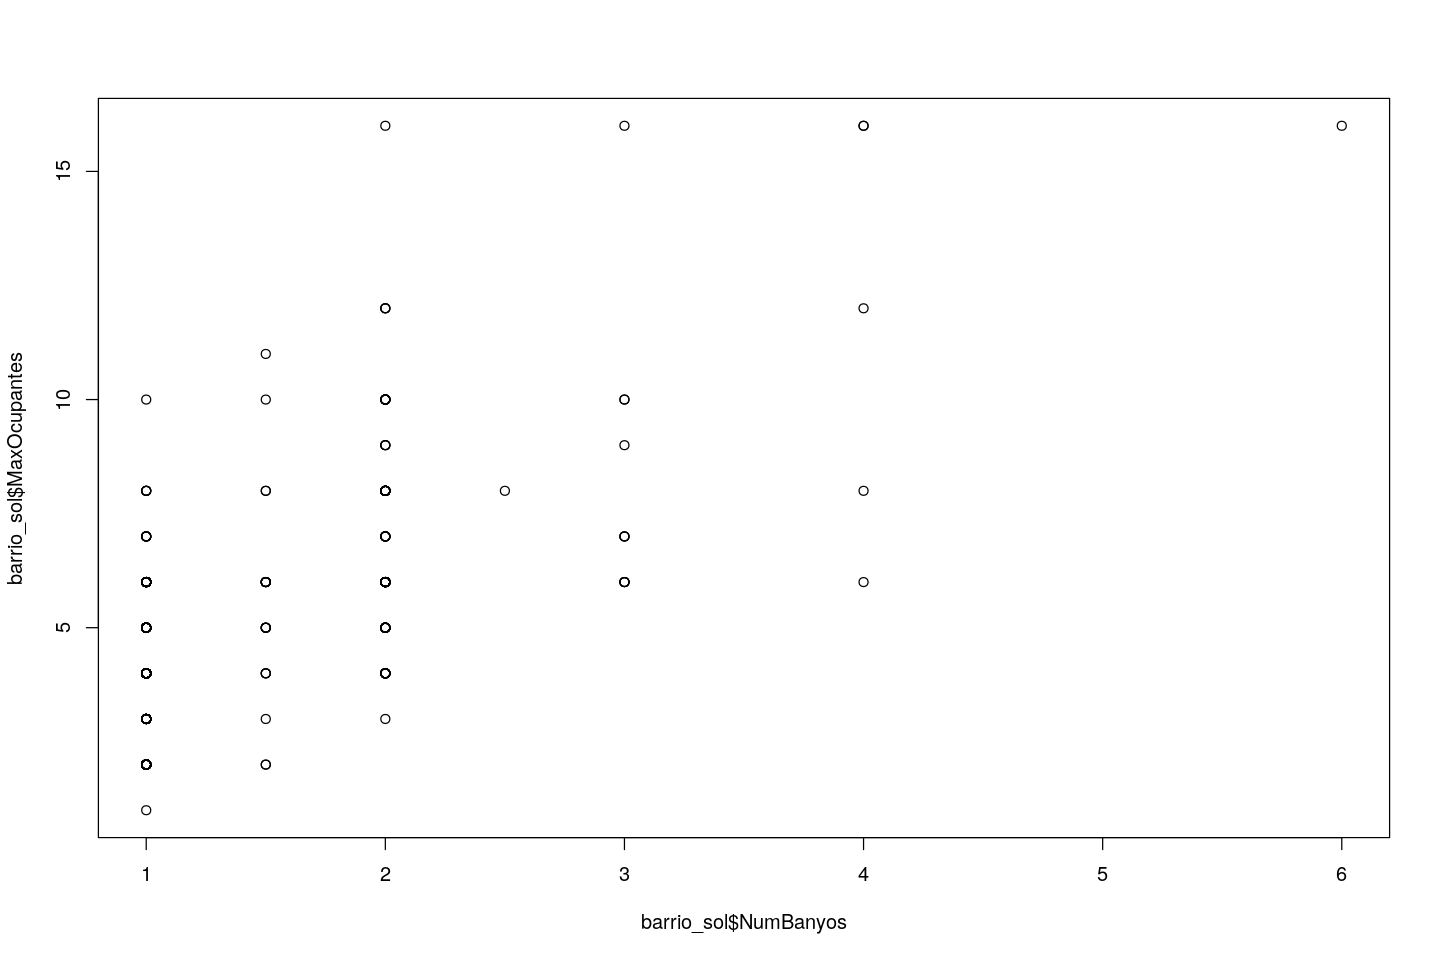

In [30]:
#NumBanyos y MaxOcupantes
paste("La correlación de las variables NumBanyos y MaxOcupantes es:",round(cor(barrio_sol$NumBanyos, barrio_sol$MaxOcupantes),2))
plot(barrio_sol$NumBanyos, barrio_sol$MaxOcupantes)

[1] "La correlación de las variables NumBanyos y MetrosCuadrados es: 0.14"

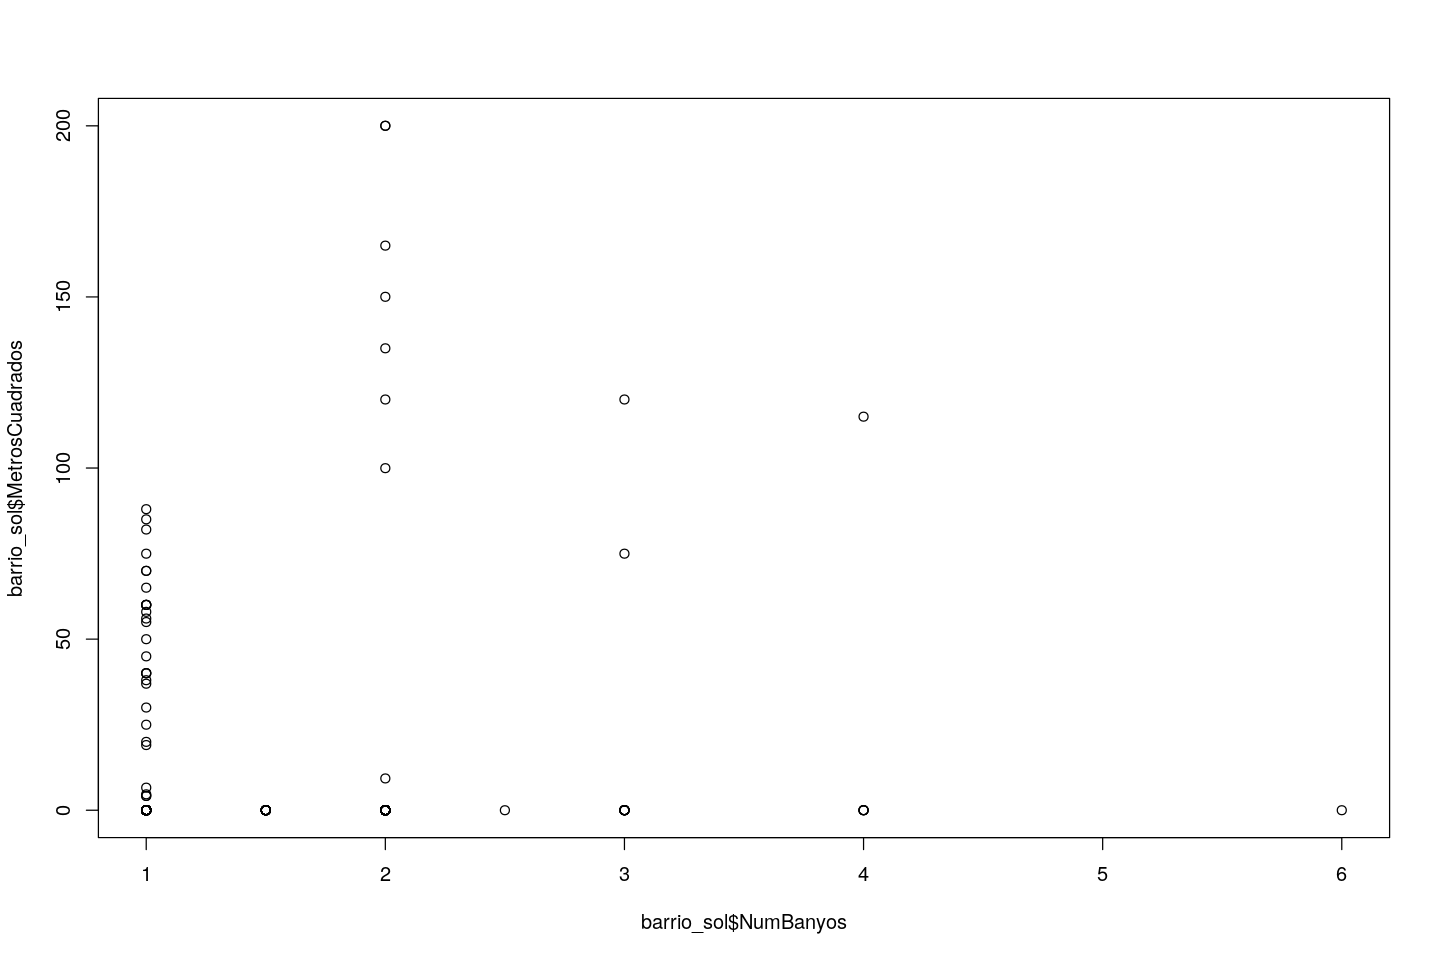

In [31]:
#NumBanyos y MetrosCuadrados
paste("La correlación de las variables NumBanyos y MetrosCuadrados es:",round(cor(barrio_sol$NumBanyos, barrio_sol$MetrosCuadrados),2))
plot(barrio_sol$NumBanyos, barrio_sol$MetrosCuadrados)

[1] "La correlación de las variables NumDormitorios y MaxOcupantes es: 0.76"

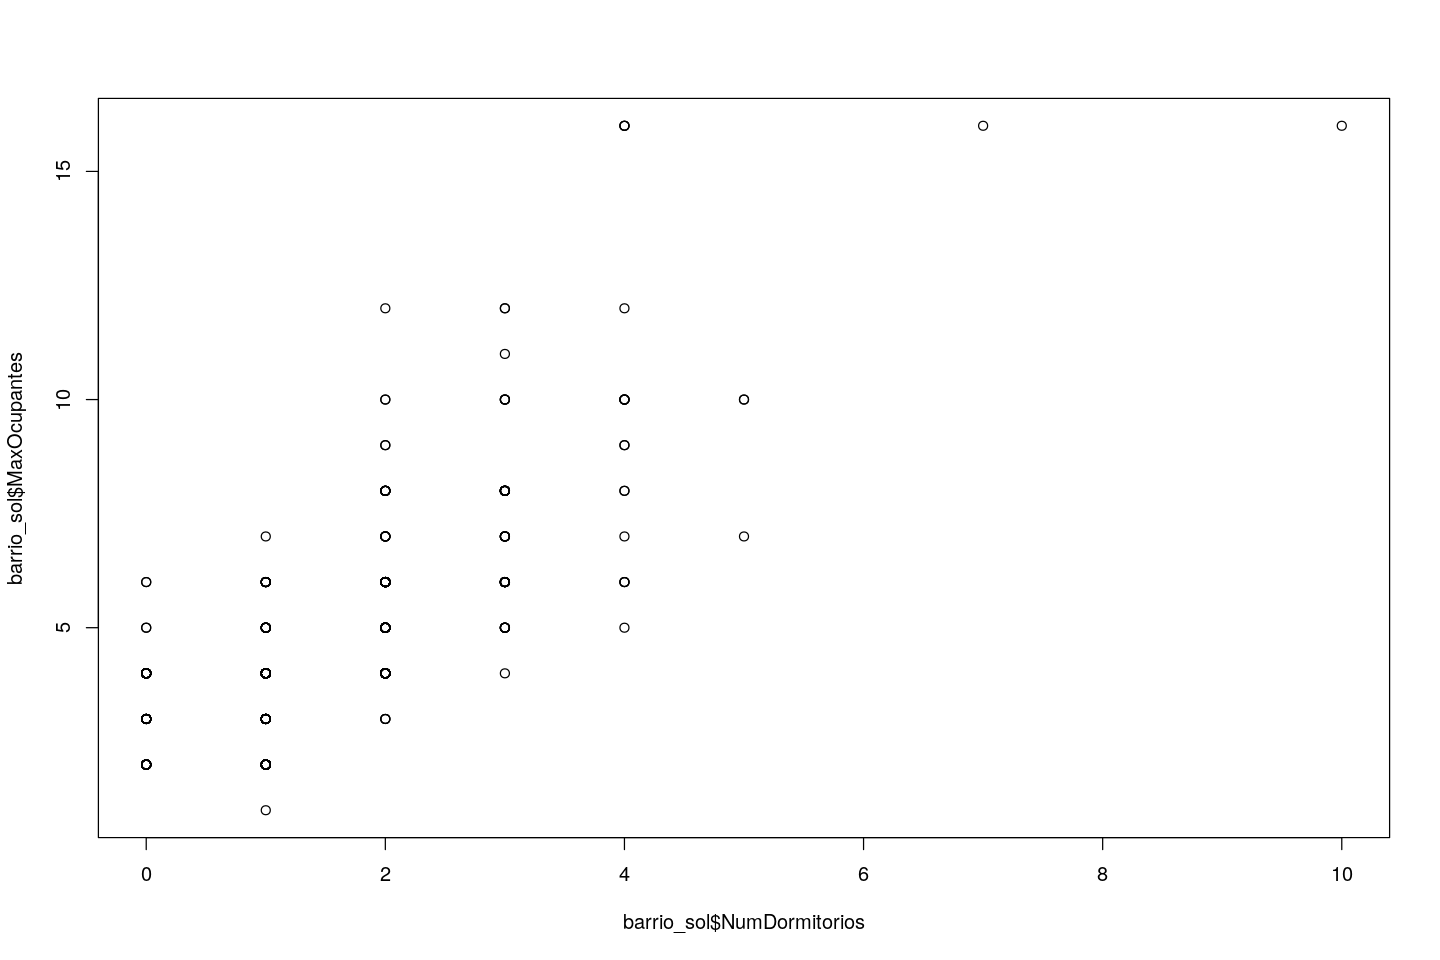

In [32]:
#NumDormitorios y MaxOcupantes
paste("La correlación de las variables NumDormitorios y MaxOcupantes es:",round(cor(barrio_sol$NumDormitorios, barrio_sol$MaxOcupantes),2))
plot(barrio_sol$NumDormitorios, barrio_sol$MaxOcupantes)

[1] "La correlación de las variables NumDormitorios y MetrosCuadrados es: 0.16"

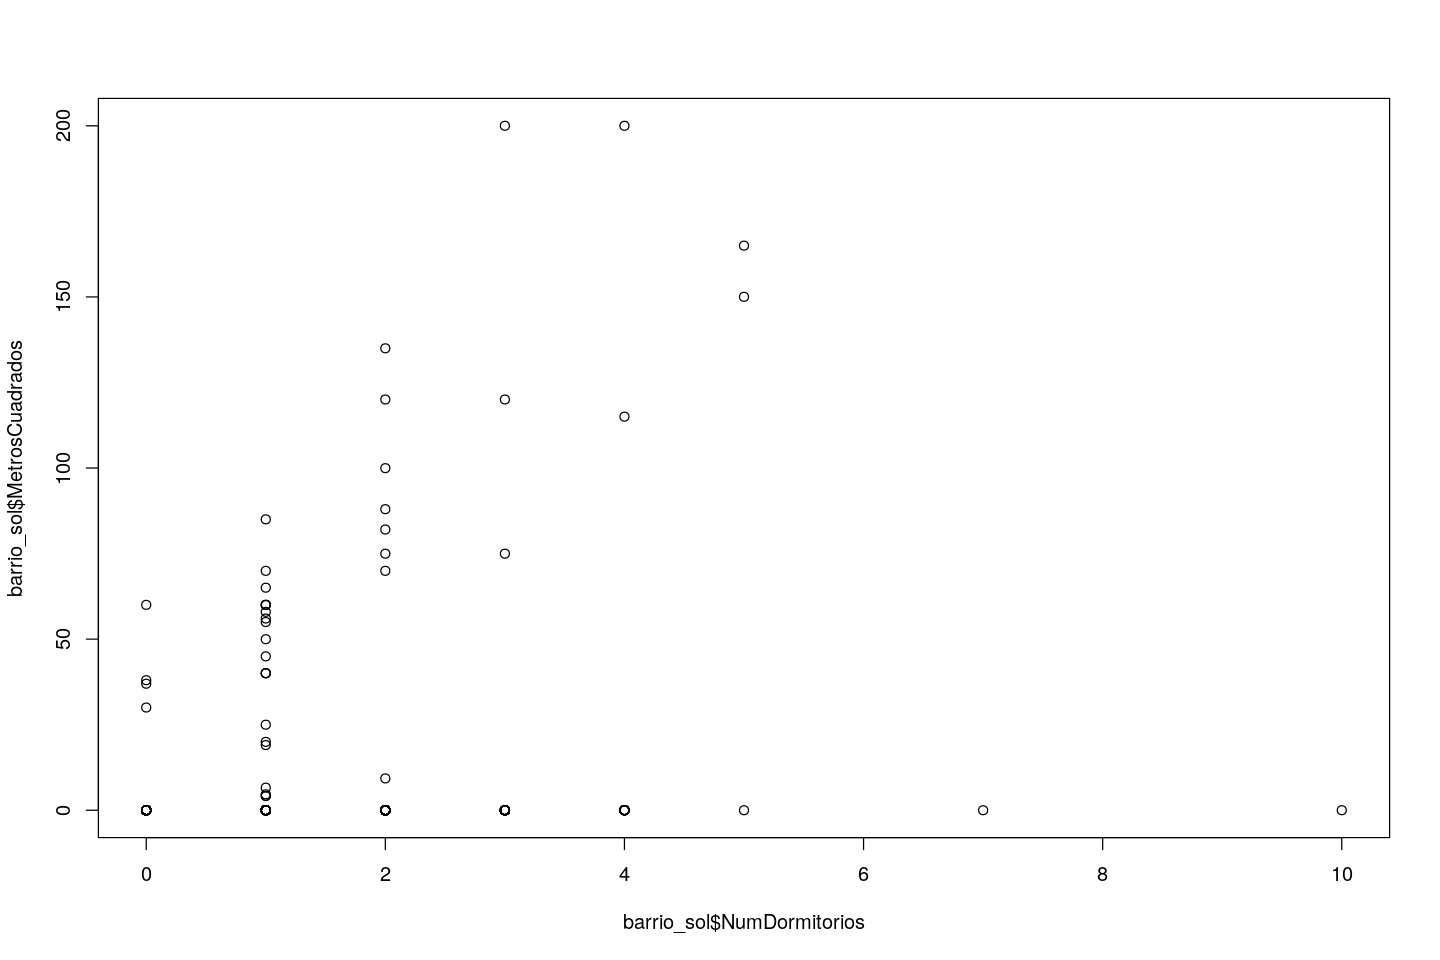

In [33]:
#NumDormitorios y MetrosCuadrados
paste("La correlación de las variables NumDormitorios y MetrosCuadrados es:",round(cor(barrio_sol$NumDormitorios, barrio_sol$MetrosCuadrados),2))
plot(barrio_sol$NumDormitorios, barrio_sol$MetrosCuadrados)

[1] "La correlación de las variables MaxOcupantes y MetrosCuadrados es: 0.16"

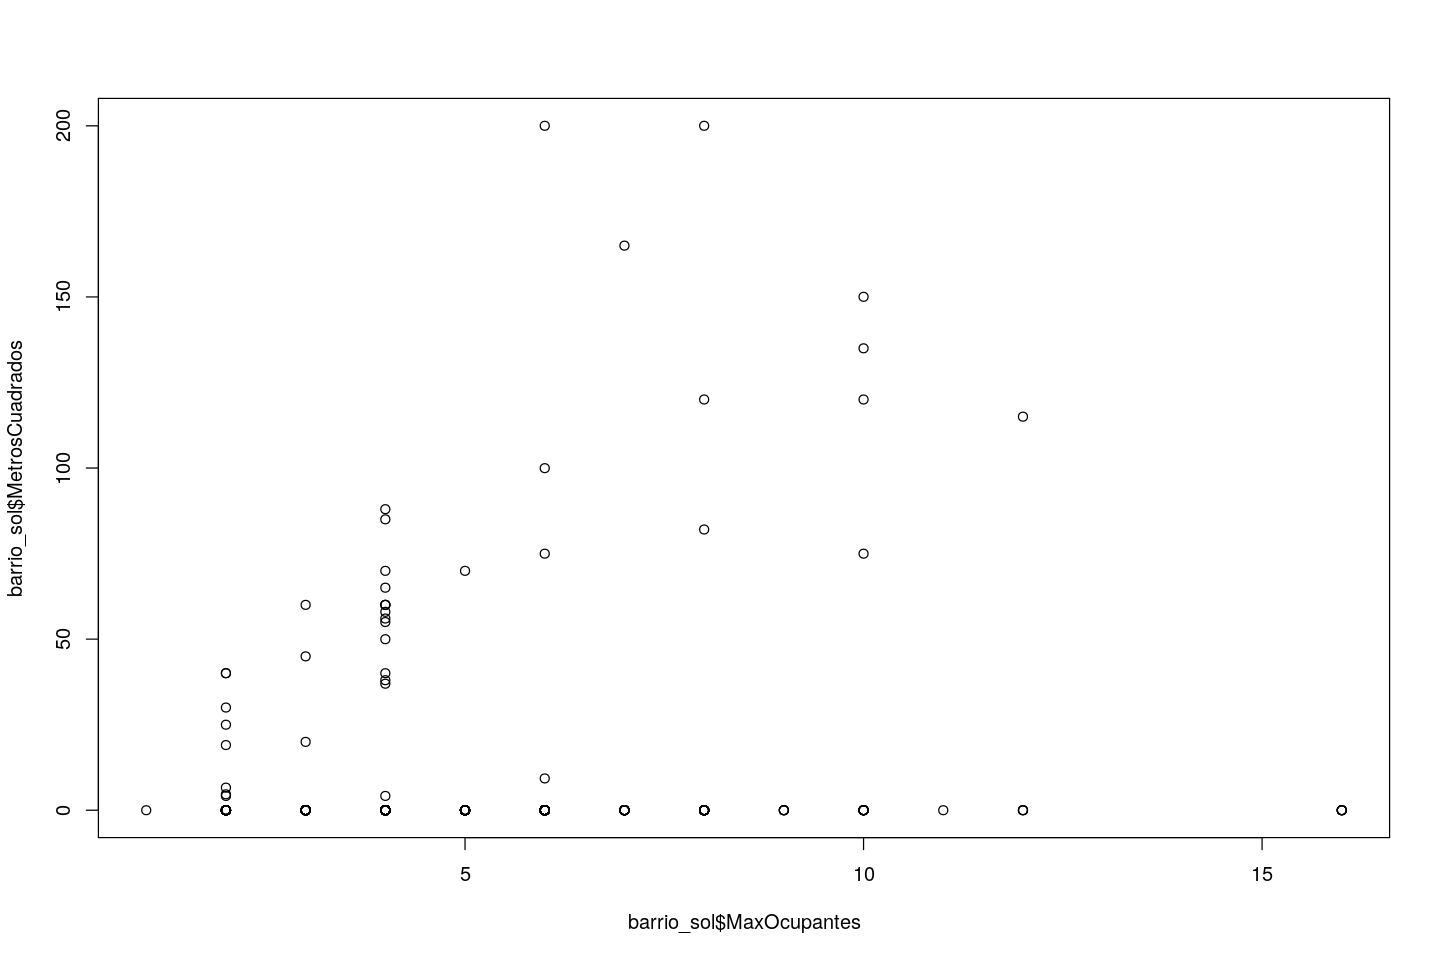

In [34]:
#MaxOcupantes y MetrosCuadrados
paste("La correlación de las variables MaxOcupantes y MetrosCuadrados es:",round(cor(barrio_sol$MaxOcupantes, barrio_sol$MetrosCuadrados),2))
plot(barrio_sol$MaxOcupantes, barrio_sol$MetrosCuadrados)

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


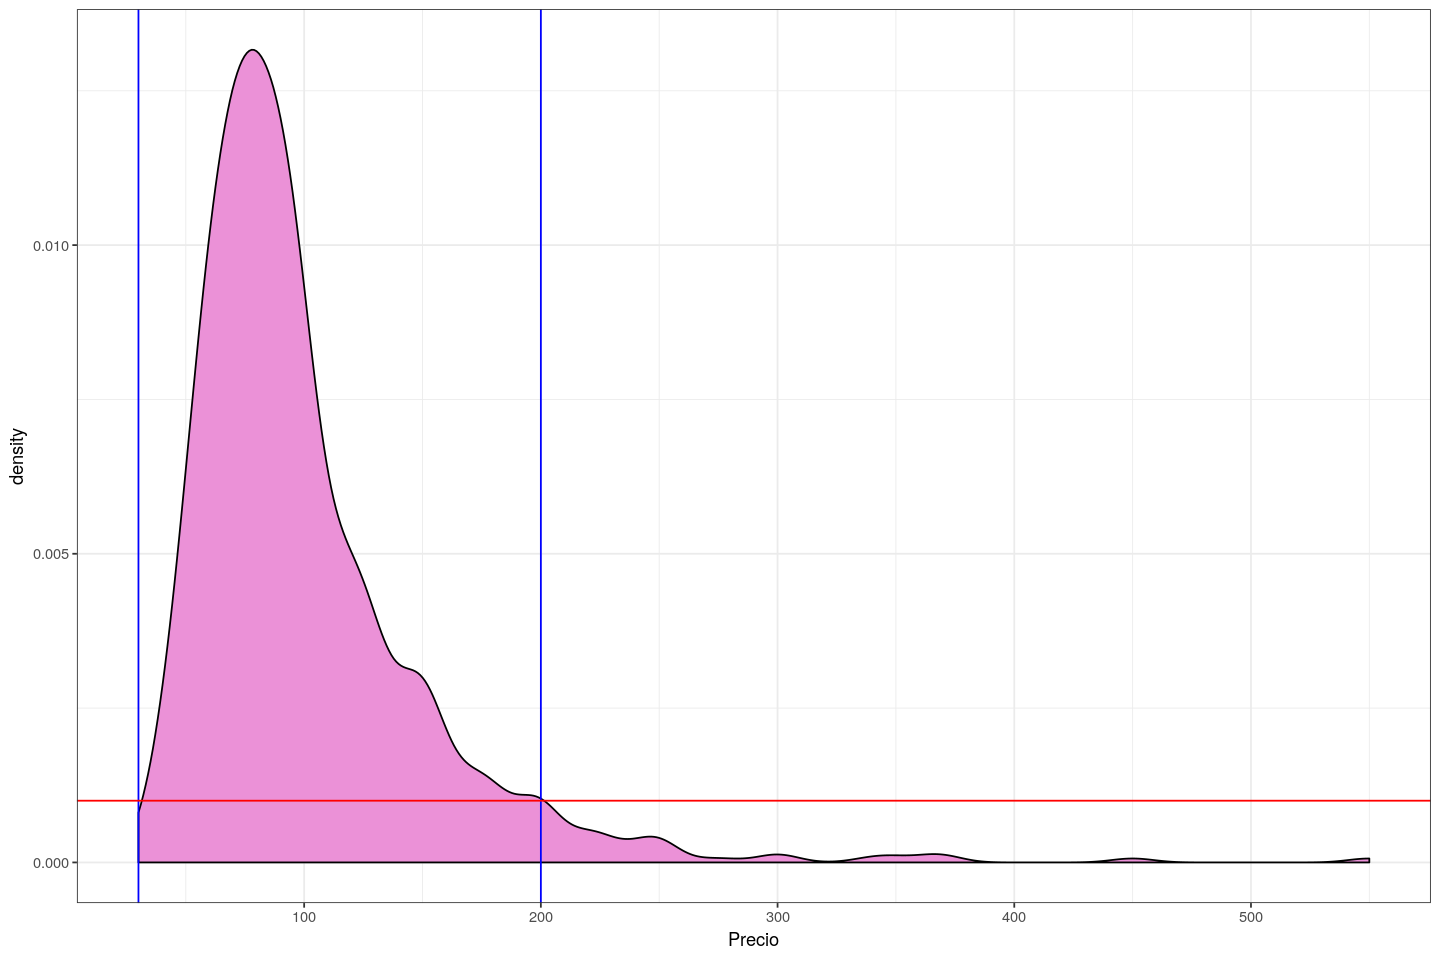

In [35]:
#Precios
ggplot(data=barrio_sol,aes(x=Precio))+
    geom_density(fill="#eb91d7")+
    geom_vline(aes(xintercept=30), color="blue")+
    geom_vline(aes(xintercept=200), color="blue")+
    geom_hline(aes(yintercept=0.001), color="red")+
    theme_bw()

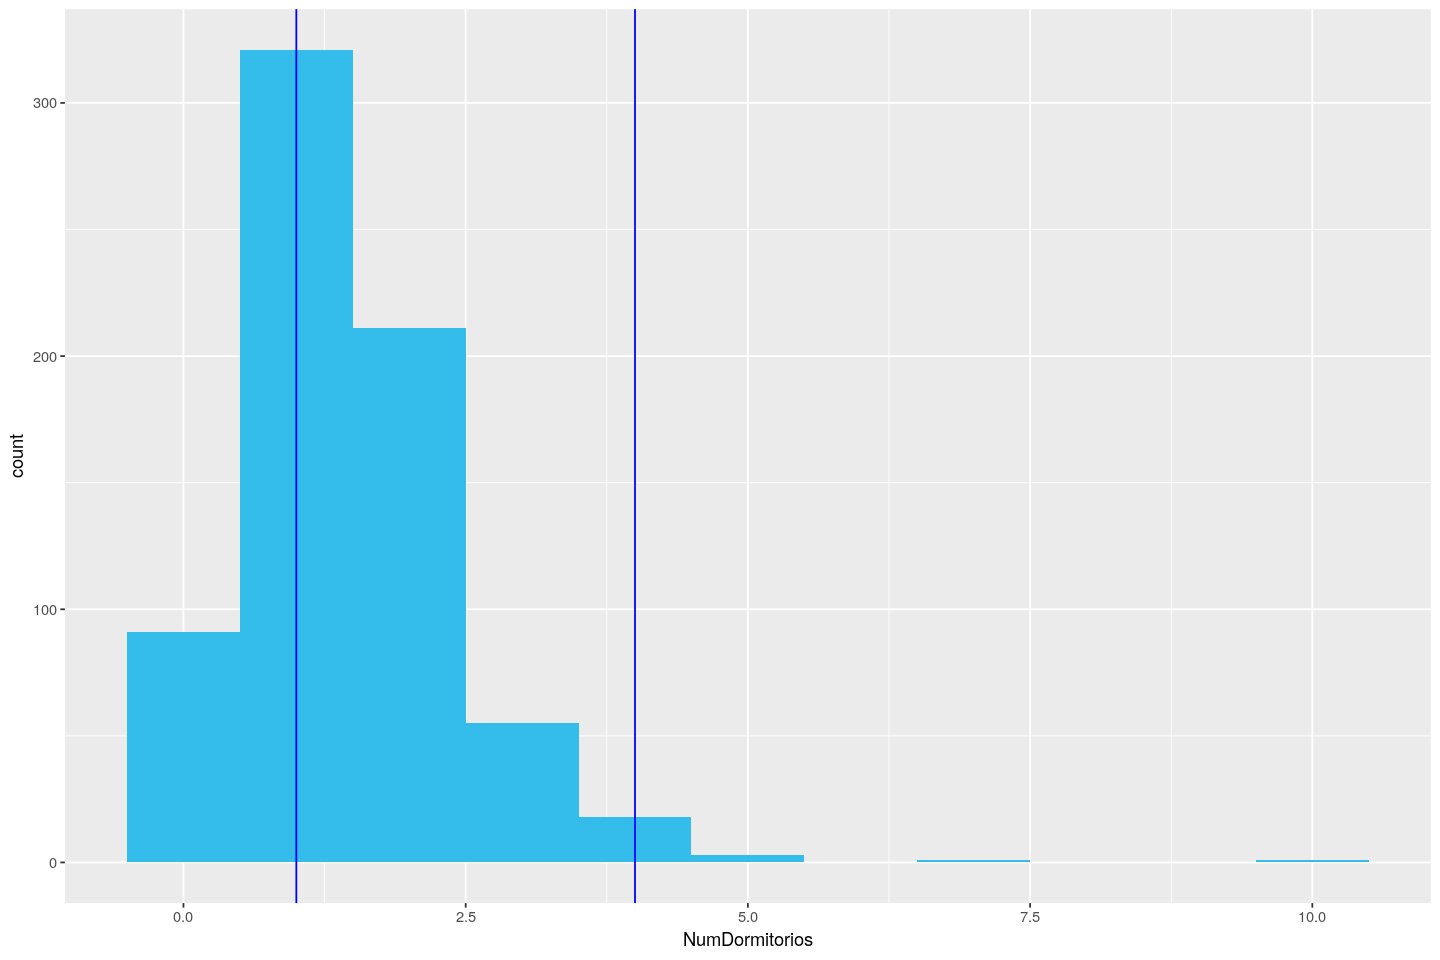

In [36]:
#NumDormitorios
ggplot(data=barrio_sol,aes(x=NumDormitorios))+
    geom_histogram(binwidth = 1, fill="#34bdeb")+
    geom_vline(aes(xintercept=1), color="blue")+
    geom_vline(aes(xintercept=4), color="blue")

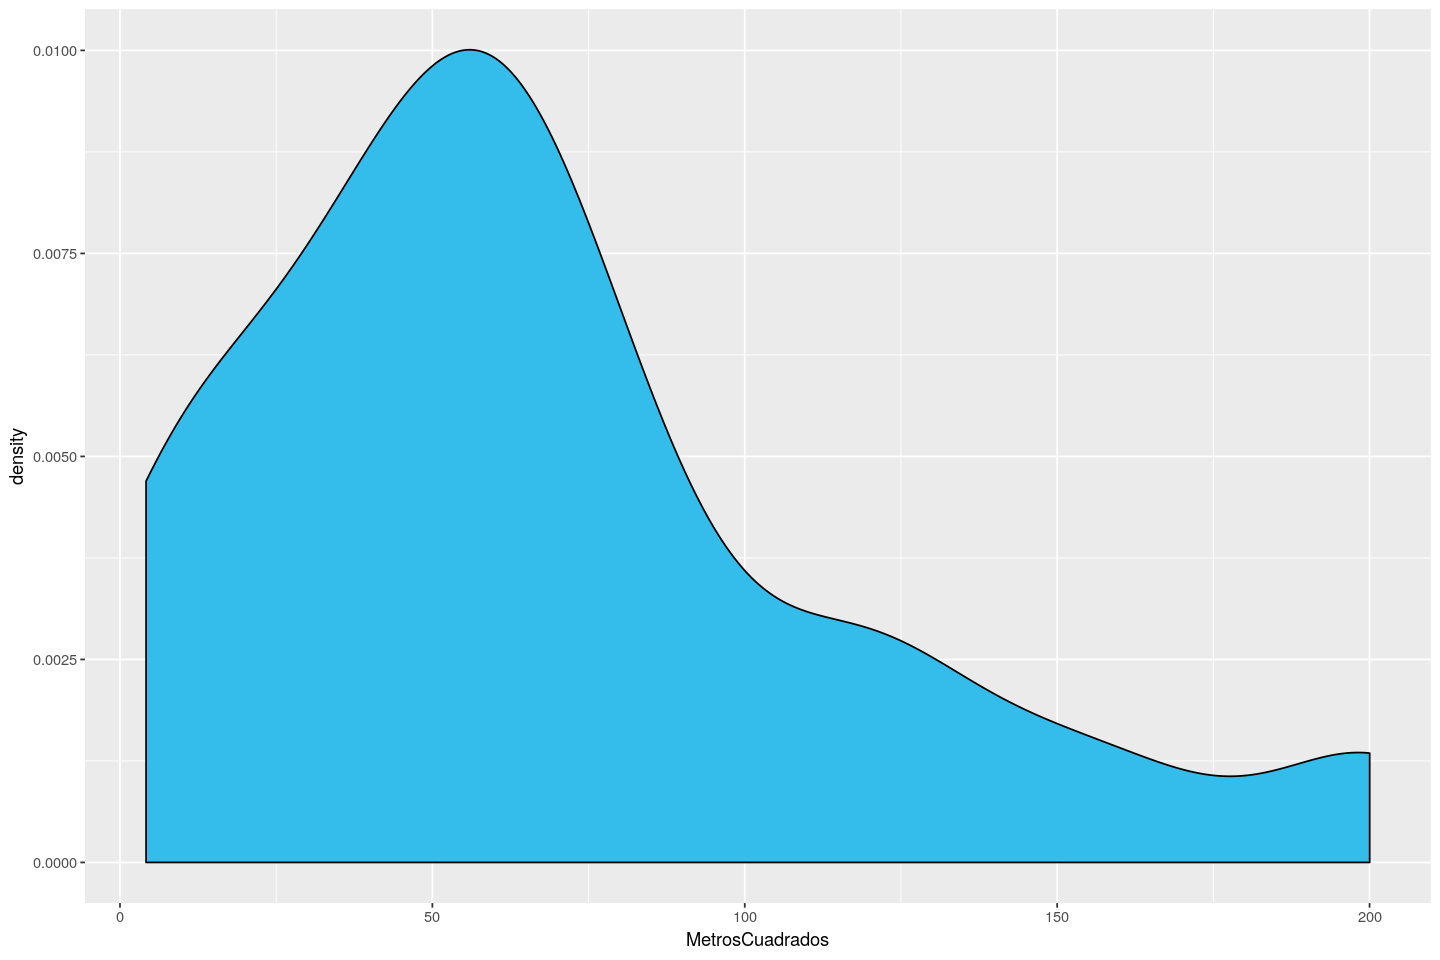

In [37]:
#MetrosCuadrados
ggplot(data=barrio_sol[barrio_sol$MetrosCuadrados>0,],aes(x=MetrosCuadrados))+
    geom_density(fill="#34bdeb")
    #geom_vline(aes(xintercept=30), color="blue")+
    #geom_vline(aes(xintercept=200), color="blue")+
    #geom_hline(aes(yintercept=0.001), color="red")+

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

[1] "La correlación de las variables Precio y MetrosCuadrados es: 0.71"

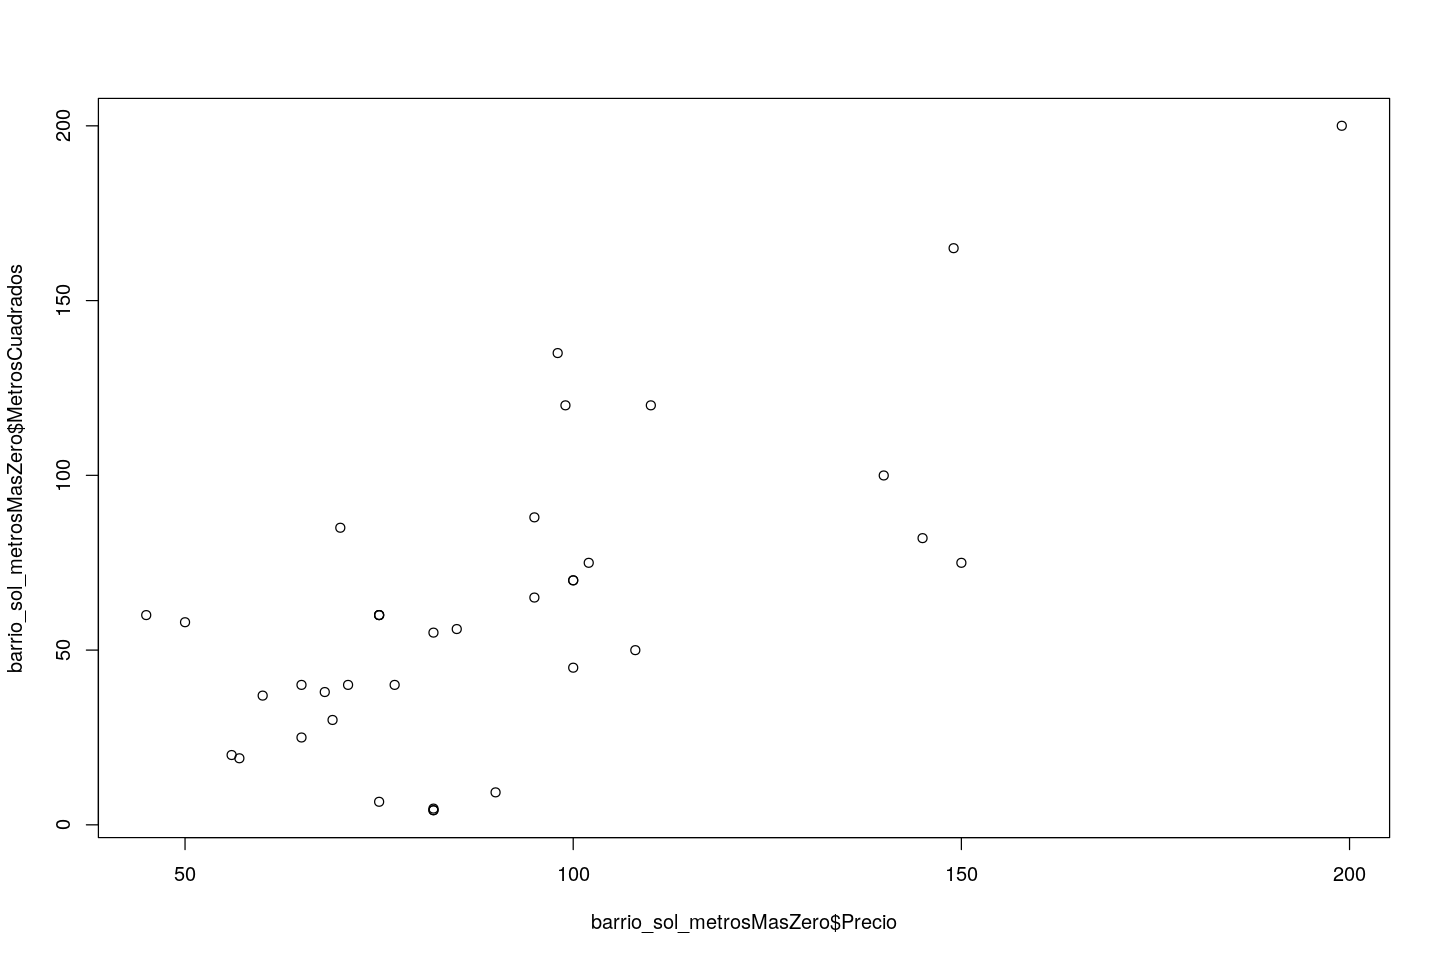

In [38]:
barrio_sol_metrosMasZero <- barrio_sol[barrio_sol$MetrosCuadrados>0 & barrio_sol$Precio >= 30 & barrio_sol$Precio <= 200,]
paste("La correlación de las variables Precio y MetrosCuadrados es:",round(cor(barrio_sol_metrosMasZero$Precio, barrio_sol_metrosMasZero$MetrosCuadrados),2))
plot(barrio_sol_metrosMasZero$Precio, barrio_sol_metrosMasZero$MetrosCuadrados)

[1] "La correlación de las variables Precio y NumDormitorios es: 0.58"

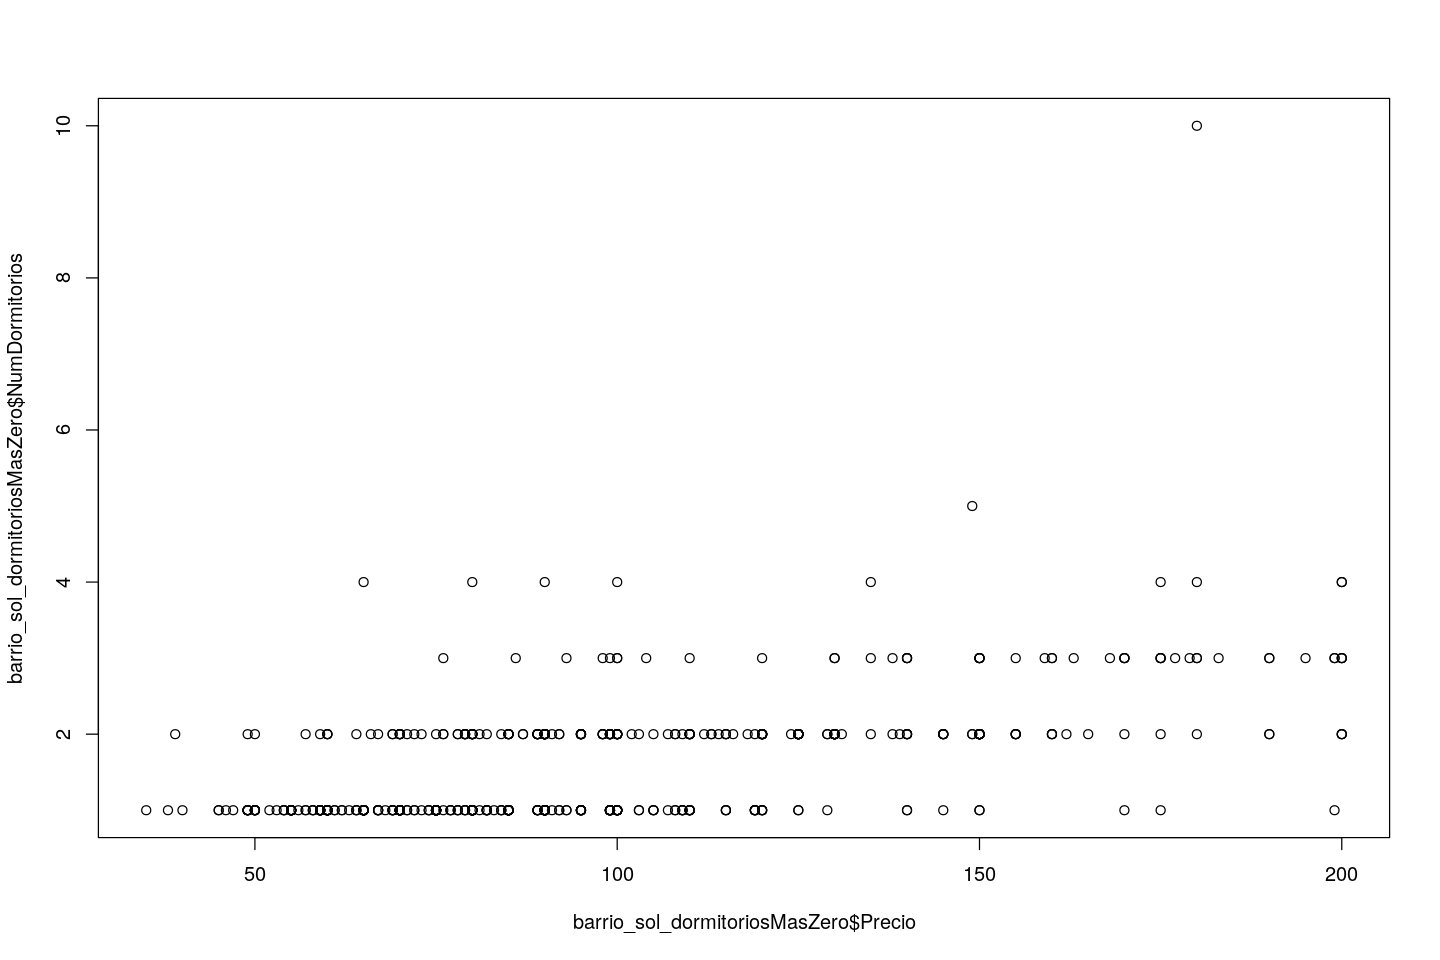

In [39]:
barrio_sol_dormitoriosMasZero <- barrio_sol[barrio_sol$NumDormitorios>0 & barrio_sol$Precio >= 30 & barrio_sol$Precio <= 200,]
paste("La correlación de las variables Precio y NumDormitorios es:",round(cor(barrio_sol_dormitoriosMasZero$Precio, barrio_sol_dormitoriosMasZero$NumDormitorios),2))
plot(barrio_sol_dormitoriosMasZero$Precio, barrio_sol_dormitoriosMasZero$NumDormitorios)

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [40]:
modelMetros<-lm(data=barrio_sol_metrosMasZero, formula = Precio ~ MetrosCuadrados)
summary(modelMetros)
confint(modelMetros)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol_metrosMasZero)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.713 -14.363  -5.113  18.086  52.537 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     58.61522    6.44856    9.09 9.69e-11 ***
MetrosCuadrados  0.51816    0.08564    6.05 6.63e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.7 on 35 degrees of freedom
Multiple R-squared:  0.5112,	Adjusted R-squared:  0.4972 
F-statistic:  36.6 on 1 and 35 DF,  p-value: 6.633e-07


,2.5 %,97.5 %
(Intercept),45.5239344,71.7064956
MetrosCuadrados,0.3442946,0.6920317


In [41]:
modelDormitorios <-lm(data=barrio_sol_dormitoriosMasZero, formula = Precio ~ NumDormitorios)
summary(modelDormitorios)
confint(modelDormitorios)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_dormitoriosMasZero)

Residuals:
     Min       1Q   Median       3Q      Max 
-137.539  -19.679   -2.572   16.428  116.428 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      56.465      2.656   21.26   <2e-16 ***
NumDormitorios   26.107      1.501   17.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.97 on 583 degrees of freedom
Multiple R-squared:  0.3417,	Adjusted R-squared:  0.3406 
F-statistic: 302.6 on 1 and 583 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),51.24845,61.68067
NumDormitorios,23.15984,29.05495


In [42]:
modelBarrioSol <-lm(data=barrio_sol_metrosMasZero, formula = Precio ~ MetrosCuadrados+NumDormitorios+NumBanyos+MaxOcupantes)
summary(modelBarrioSol)
confint(modelBarrioSol)


Call:
lm(formula = Precio ~ MetrosCuadrados + NumDormitorios + NumBanyos + 
    MaxOcupantes, data = barrio_sol_metrosMasZero)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.026 -11.221  -2.058  11.925  47.820 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      49.9926     8.5059   5.877 1.55e-06 ***
MetrosCuadrados   0.2413     0.1175   2.054  0.04823 *  
NumDormitorios   15.9285     5.7974   2.748  0.00978 ** 
NumBanyos         0.8516    11.2554   0.076  0.94016    
MaxOcupantes      0.5733     2.8360   0.202  0.84108    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.22 on 32 degrees of freedom
Multiple R-squared:  0.6453,	Adjusted R-squared:  0.601 
F-statistic: 14.56 on 4 and 32 DF,  p-value: 7.097e-07


,2.5 %,97.5 %
(Intercept),32.666593882,67.3185834
MetrosCuadrados,0.001993577,0.4805506
NumDormitorios,4.119706940,27.7373689
NumBanyos,-22.074854735,23.7779655
MaxOcupantes,-5.203505170,6.3500837


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [43]:
modelMetros<-lm(data=barrio_sol_metrosMasZero, formula = Precio ~ MetrosCuadrados)
summary(modelMetros)
confint(modelMetros)
print("El precio incrementa 0.51816 Euros por cada metro cuadrado")


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol_metrosMasZero)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.713 -14.363  -5.113  18.086  52.537 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     58.61522    6.44856    9.09 9.69e-11 ***
MetrosCuadrados  0.51816    0.08564    6.05 6.63e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.7 on 35 degrees of freedom
Multiple R-squared:  0.5112,	Adjusted R-squared:  0.4972 
F-statistic:  36.6 on 1 and 35 DF,  p-value: 6.633e-07


,2.5 %,97.5 %
(Intercept),45.5239344,71.7064956
MetrosCuadrados,0.3442946,0.6920317


[1] "El precio incrementa 0.51816 Euros por cada metro cuadrado"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [44]:
modelDormitorios <-lm(data=barrio_sol_dormitoriosMasZero, formula = Precio ~ NumDormitorios)
summary(modelDormitorios)
confint(modelDormitorios)
print("El precio incrementa 26.107 Euros por cada Dormitorio adicional")


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_dormitoriosMasZero)

Residuals:
     Min       1Q   Median       3Q      Max 
-137.539  -19.679   -2.572   16.428  116.428 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      56.465      2.656   21.26   <2e-16 ***
NumDormitorios   26.107      1.501   17.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.97 on 583 degrees of freedom
Multiple R-squared:  0.3417,	Adjusted R-squared:  0.3406 
F-statistic: 302.6 on 1 and 583 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),51.24845,61.68067
NumDormitorios,23.15984,29.05495


[1] "El precio incrementa 26.107 Euros por cada Dormitorio adicional"


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [45]:
#Cantidad de entradas con 3 dormitorios
nrow(barrio_sol[barrio_sol$NumDormitorios==3,])
#Cantidad de entradas totales
nrow(barrio_sol)
#Probabilidad
print("Tomando en cuenta que la cantidad de dormitorios es una variable discreta")
paste("La probabilidad de un alquiler de 3 dormitorios es:",round(55/701,4))


[1] 55

[1] 701

[1] "Tomando en cuenta que la cantidad de dormitorios es una variable discreta"


[1] "La probabilidad de un alquiler de 3 dormitorios es: 0.0785"

In [46]:
x <- na.omit(barrio_sol$NumDormitorios[barrio_sol$NumDormitorios>0])
x
dnorm(x)


[1]  1  2  1  2  1  1  4  2  1  1  1  2  2  3  1  2  1  1  1  2  2  1  1  2  1
 [26]  4  2  2  2  4  1  1  2  4  1  2  3  1  1  1  1  2  1  7  1  2  1  2  2  2
 [51]  1  2  2  1  1  1  1  1  2  1  1  2  1  3  1  2  2  1  3  2  2  1  1  1  1
 [76]  2  3  1  1  2  2  1  2  1 10  4  1  1  1  2  1  1  1  2  1  2  2  2  2  1
[101]  2  1  1  1  2  1  2  1  1  2  2  2  2  1  2  1  2  2  3  2  1  1  1  1  2
[126]  1  1  2  1  1  1  2  1  1  1  2  1  2  1  2  2  1  1  1  1  1  2  2  1  1
[151]  3  1  1  3  2  2  1  2  1  1  1  1  3  1  1  1  2  1  2  3  1  1  2  2  2
[176]  2  2  2  1  4  1  1  1  1  1  1  2  1  1  2  1  2  1  1  3  1  1  1  1  1
[201]  1  1  3  2  1  1  1  1  1  1  1  1  4  1  2  2  1  2  1  1  2  3  2  2  1
[226]  1  1  1  2  1  1  1  2  1  2  1  1  2  1  2  1  2  1  2  1  2  2  3  1  2
[251]  1  4  4  2  2  2  2  2  1  3  2  3  1  1  1  2  1  1  3  1  4  2  1  2  3
[276]  3  2  4  1  2  2  1  3  2  2  1  2  3  2  1  1  1  1  1  2  1  1  2  1  2
[301]  1  1  1  2  2  3  2  1  2  1  1  1  1  3  5  1  2  2  2  1  1  3  1  2  1
[326]  2  1  1  3  1  3  2  2  2  1  2  3  3  2  1  1  1  1  1  1  2  2  2  1  1
[351]  2  1  1  2  2  1  1  1  1  2  1  2  1  1  2  2  2  2  1  2  3  2  2  2  2
[376]  1  1  1  2  2  4  1  1  1  1  1  2  1  1  1  1  3  2  2  3  2  1  1  1  1
[401]  4  2  2  1  1  1  1  3  1  1  3  2  2  2  2  1  1  1  2  3  3  1  1  4  2
[426]  2  1  5  1  1  2  4  1  1  2  1  2  1  2  4  1  3  1  1  2  2  1  2  1  1
[451]  1  1  1  1  1  1  1  1  1  3  2  1  2  1  1  3  2  1  2  1  1  2  1  2  1
[476]  1  4  1  1  1  2  1  2  2  2  1  1  1  2  2  2  1  1  5  3  2  1  1  3  1
[501]  1  3  1  1  1  1  2  1  1  2  1  3  4  1  1  1  1  1  2  1  1  2  2  3  1
[526]  3  1  2  2  2  1  1  1  3  1  1  2  1  3  2  3  2  1  2  2  1  2  1  2  1
[551]  1  2  1  1  1  1  2  1  1  1  3  3  1  2  1  2  2  2  2  1  2  3  2  2  1
[576]  1  3  3  2  2  2  2  1  2  3  1  2  2  2  1  3  1  1  1  1  1  1  1  1  1
[601]  1  3  2  2  2  1  2  1  1  1

[1] 2.419707e-01 5.399097e-02 2.419707e-01 5.399097e-02 2.419707e-01
  [6] 2.419707e-01 1.338302e-04 5.399097e-02 2.419707e-01 2.419707e-01
 [11] 2.419707e-01 5.399097e-02 5.399097e-02 4.431848e-03 2.419707e-01
 [16] 5.399097e-02 2.419707e-01 2.419707e-01 2.419707e-01 5.399097e-02
 [21] 5.399097e-02 2.419707e-01 2.419707e-01 5.399097e-02 2.419707e-01
 [26] 1.338302e-04 5.399097e-02 5.399097e-02 5.399097e-02 1.338302e-04
 [31] 2.419707e-01 2.419707e-01 5.399097e-02 1.338302e-04 2.419707e-01
 [36] 5.399097e-02 4.431848e-03 2.419707e-01 2.419707e-01 2.419707e-01
 [41] 2.419707e-01 5.399097e-02 2.419707e-01 9.134720e-12 2.419707e-01
 [46] 5.399097e-02 2.419707e-01 5.399097e-02 5.399097e-02 5.399097e-02
 [51] 2.419707e-01 5.399097e-02 5.399097e-02 2.419707e-01 2.419707e-01
 [56] 2.419707e-01 2.419707e-01 2.419707e-01 5.399097e-02 2.419707e-01
 [61] 2.419707e-01 5.399097e-02 2.419707e-01 4.431848e-03 2.419707e-01
 [66] 5.399097e-02 5.399097e-02 2.419707e-01 4.431848e-03 5.399097e-02
 [71] 5.399097e-02 2.419707e-01 2.419707e-01 2.419707e-01 2.419707e-01
 [76] 5.399097e-02 4.431848e-03 2.419707e-01 2.419707e-01 5.399097e-02
 [81] 5.399097e-02 2.419707e-01 5.399097e-02 2.419707e-01 7.694599e-23
 [86] 1.338302e-04 2.419707e-01 2.419707e-01 2.419707e-01 5.399097e-02
 [91] 2.419707e-01 2.419707e-01 2.419707e-01 5.399097e-02 2.419707e-01
 [96] 5.399097e-02 5.399097e-02 5.399097e-02 5.399097e-02 2.419707e-01
[101] 5.399097e-02 2.419707e-01 2.419707e-01 2.419707e-01 5.399097e-02
[106] 2.419707e-01 5.399097e-02 2.419707e-01 2.419707e-01 5.399097e-02
[111] 5.399097e-02 5.399097e-02 5.399097e-02 2.419707e-01 5.399097e-02
[116] 2.419707e-01 5.399097e-02 5.399097e-02 4.431848e-03 5.399097e-02
[121] 2.419707e-01 2.419707e-01 2.419707e-01 2.419707e-01 5.399097e-02
[126] 2.419707e-01 2.419707e-01 5.399097e-02 2.419707e-01 2.419707e-01
[131] 2.419707e-01 5.399097e-02 2.419707e-01 2.419707e-01 2.419707e-01
[136] 5.399097e-02 2.419707e-01 5.399097e-02 2.419707e-01 5.399097e-02
[141] 5.399097e-02 2.419707e-01 2.419707e-01 2.419707e-01 2.419707e-01
[146] 2.419707e-01 5.399097e-02 5.399097e-02 2.419707e-01 2.419707e-01
[151] 4.431848e-03 2.419707e-01 2.419707e-01 4.431848e-03 5.399097e-02
[156] 5.399097e-02 2.419707e-01 5.399097e-02 2.419707e-01 2.419707e-01
[161] 2.419707e-01 2.419707e-01 4.431848e-03 2.419707e-01 2.419707e-01
[166] 2.419707e-01 5.399097e-02 2.419707e-01 5.399097e-02 4.431848e-03
[171] 2.419707e-01 2.419707e-01 5.399097e-02 5.399097e-02 5.399097e-02
[176] 5.399097e-02 5.399097e-02 5.399097e-02 2.419707e-01 1.338302e-04
[181] 2.419707e-01 2.419707e-01 2.419707e-01 2.419707e-01 2.419707e-01
[186] 2.419707e-01 5.399097e-02 2.419707e-01 2.419707e-01 5.399097e-02
[191] 2.419707e-01 5.399097e-02 2.419707e-01 2.419707e-01 4.431848e-03
[196] 2.419707e-01 2.419707e-01 2.419707e-01 2.419707e-01 2.419707e-01
[201] 2.419707e-01 2.419707e-01 4.431848e-03 5.399097e-02 2.419707e-01
[206] 2.419707e-01 2.419707e-01 2.419707e-01 2.419707e-01 2.419707e-01
[211] 2.419707e-01 2.419707e-01 1.338302e-04 2.419707e-01 5.399097e-02
[216] 5.399097e-02 2.419707e-01 5.399097e-02 2.419707e-01 2.419707e-01
[221] 5.399097e-02 4.431848e-03 5.399097e-02 5.399097e-02 2.419707e-01
[226] 2.419707e-01 2.419707e-01 2.419707e-01 5.399097e-02 2.419707e-01
[231] 2.419707e-01 2.419707e-01 5.399097e-02 2.419707e-01 5.399097e-02
[236] 2.419707e-01 2.419707e-01 5.399097e-02 2.419707e-01 5.399097e-02
[241] 2.419707e-01 5.399097e-02 2.419707e-01 5.399097e-02 2.419707e-01
[246] 5.399097e-02 5.399097e-02 4.431848e-03 2.419707e-01 5.399097e-02
[251] 2.419707e-01 1.338302e-04 1.338302e-04 5.399097e-02 5.399097e-02
[256] 5.399097e-02 5.399097e-02 5.399097e-02 2.419707e-01 4.431848e-03
[261] 5.399097e-02 4.431848e-03 2.419707e-01 2.419707e-01 2.419707e-01
[266] 5.399097e-02 2.419707e-01 2.419707e-01 4.431848e-03 2.419707e-01
[271] 1.338302e-04 5.399097e-02 2.419707e-01 5.399097e-02 4.431848e-03
[276] 4.431848e-03 5.399097e-02 1.338302e-04 2.419707e-01 5.399097e-02
[281] 5.399097e-02 2.41970

In [47]:
tw<-t.test(barrio_sol$NumDormitorios[barrio_sol$NumDormitorios==3],barrio_sol$NumDormitorios[barrio_sol$NumDormitorios!=3])
tw


	Welch Two Sample t-test

data:  barrio_sol$NumDormitorios[barrio_sol$NumDormitorios == 3] and barrio_sol$NumDormitorios[barrio_sol$NumDormitorios != 3]
t = 45.804, df = 645, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.616452 1.761257
sample estimates:
mean of x mean of y 
 3.000000  1.311146 
